In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

adult_train = pd.read_csv('adult.data', header=None, na_values=' ?')
adult_test = pd.read_csv('adult.test', header=None, na_values=' ?')
with open("adult.names") as csvfile:
    describe = list(csv.reader(csvfile))

### extract column names

In [4]:
col_class = dict()
for row in col_names:
    indices = row[0].find(':')
    names = row[0][:indices]
    classes = [row[0][indices+1:]]+row[1:]
    col_class[names] = classes

In [5]:
col = list(col_class.keys())+['income']
print(col)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [6]:
adult_train.columns=col
adult_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
adult_test.columns=col
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
#训练数据集和测试数据集合并，方便进行数据的预处理
adult_data = pd.concat([adult_train, adult_test])

In [9]:
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
adult_data.shape

(48842, 15)

### 处理缺失值

In [10]:
#查看数据的缺失情况
adult_data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [11]:
#可以看到有三个特征的缺失比较严重,而且都是属于字符型特征，因为字符型特征不好填充，直接扔掉算了
adult_data = adult_data.dropna()

### 处理文字label

In [12]:
adult_data['income'].value_counts()

 <=50K     22654
 <=50K.    11360
 >50K       7508
 >50K.      3700
Name: income, dtype: int64

In [13]:
adult_data.loc[adult_data['income']==' <=50K.','income']=' <=50K'
adult_data.loc[adult_data['income']==' >50K.','income']=' >50K'

In [14]:
adult_data['income'].value_counts()

 <=50K    34014
 >50K     11208
Name: income, dtype: int64

### Visualization
+ age
+ education num and education
+ hours-per-week

In [15]:
## age
age=adult_data['age']
min_age=age.min();max_age=age.max();aver=age.mean()
print(min_age,max_age,aver)

17 90 38.547941267524656


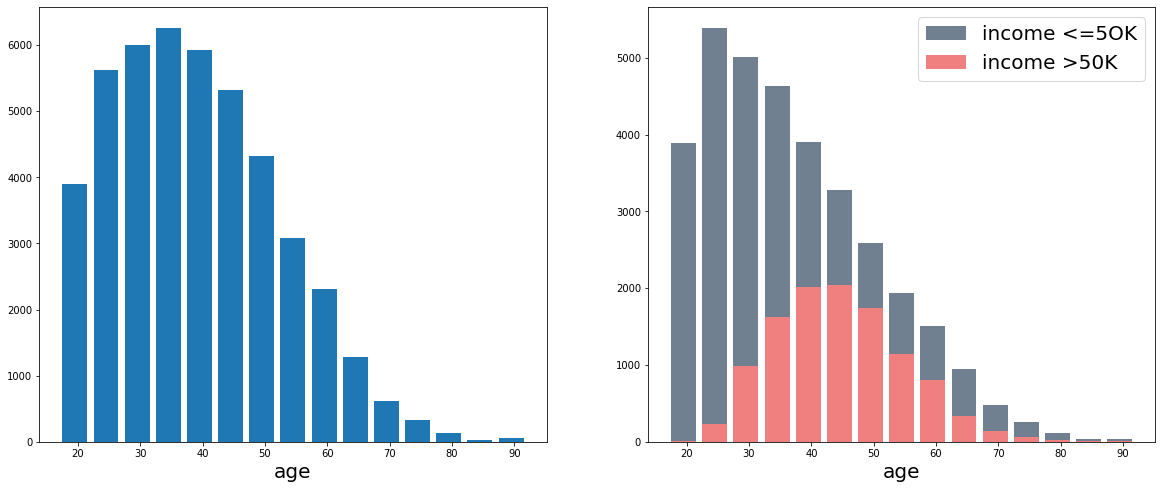

In [16]:
bins=[17,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92]
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(age,bins=bins,rwidth=0.8)
ax[0].set_xlabel('age',fontsize=20)
ax[1].hist(age[adult_data['income']==' <=50K'],bins=bins,rwidth=0.8,color='slategrey',label='income <=5OK')
ax[1].hist(age[adult_data['income']==' >50K'],bins=bins,rwidth=0.8,color='lightcoral',label='income >50K')
ax[1].set_xlabel('age',fontsize=20)
ax[1].legend(fontsize=20)
plt.show()

In [17]:
## education
ed=adult_data['education'].value_counts().index.tolist()
edn=adult_data['education-num'].value_counts().index.tolist()
for i in range(len(ed)):
    if list(adult_data['education']==ed[i])==list(adult_data['education-num']==edn[i]):
        print(ed[i]+' is equvialent to '+str(edn[i]))

 HS-grad is equvialent to 9
 Some-college is equvialent to 10
 Bachelors is equvialent to 13
 Masters is equvialent to 14
 Assoc-voc is equvialent to 11
 11th is equvialent to 7
 Assoc-acdm is equvialent to 12
 10th is equvialent to 6
 7th-8th is equvialent to 4
 Prof-school is equvialent to 15
 9th is equvialent to 5
 12th is equvialent to 8
 Doctorate is equvialent to 16
 5th-6th is equvialent to 3
 1st-4th is equvialent to 2
 Preschool is equvialent to 1


In [18]:
## hours per week
hpw=adult_data['hours-per-week']
min_hpw=hpw.min();max_hpw=hpw.max();avehpw=hpw.mean()
print(min_hpw,max_hpw,avehpw)

1 99 40.93801689443191


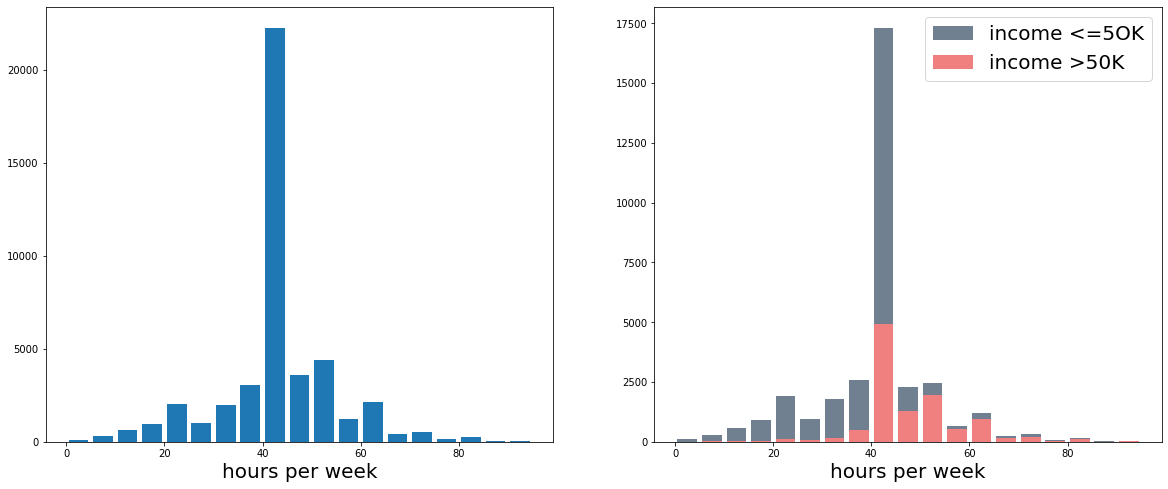

In [19]:
bins=np.arange(0,100,5)
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].hist(hpw,bins=bins,rwidth=0.8)
ax[0].set_xlabel('hours per week',fontsize=20)
ax[1].hist(hpw[adult_data['income']==' <=50K'],bins=bins,rwidth=0.8,color='slategrey',label='income <=5OK')
ax[1].hist(hpw[adult_data['income']==' >50K'],bins=bins,rwidth=0.8,color='lightcoral',label='income >50K')
ax[1].set_xlabel('hours per week',fontsize=20)
ax[1].legend(fontsize=20)
plt.show()

In [169]:
## capital gain and loss
cg=adult_data['capital-gain']
cl=adult_data['capital-loss']
max_cl=cl.max();max_cg=cg.max();min_cl=cl[cl>0].min();min_cg=cg[cg>0].min()
print(max_cl,max_cg,min_cl,min_cg,adult_data.loc[(cg>0)&(cl>0),'income'].count())

4356 99999 155 114 0


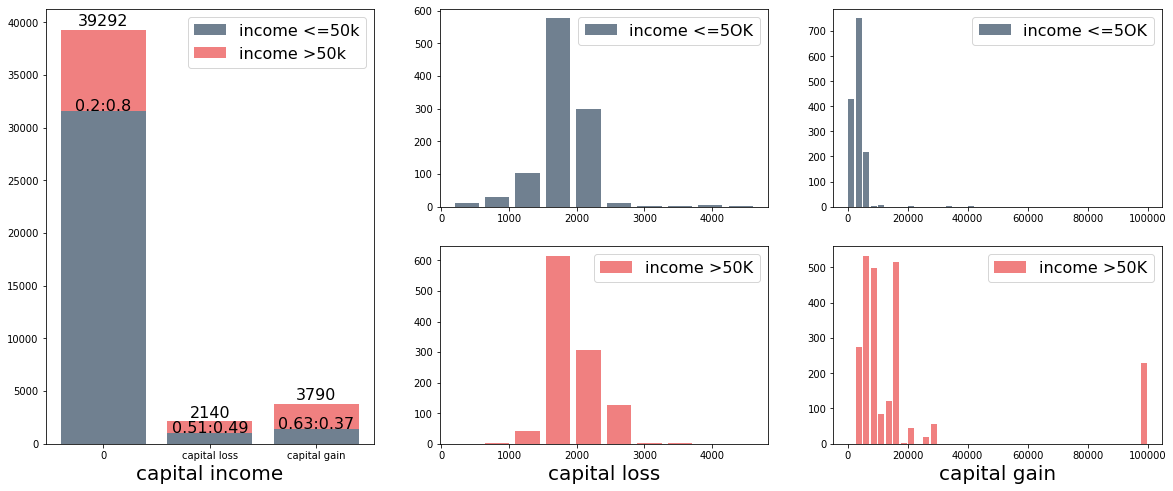

In [171]:
from matplotlib.gridspec import GridSpec
fig=plt.figure(figsize=(20,8))

gs=GridSpec(2,3) # 2 rows, 3 columns

ax1=fig.add_subplot(gs[:,0]) # First row, first column
ax2=fig.add_subplot(gs[0,1]) # First row, second column
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[0,2]) # First row, third column
ax5=fig.add_subplot(gs[1,2]) # Second row, span all columns
list_=['0','capital loss','capital gain']
g50k=[adult_data.loc[(adult_data['income']==' >50K')&(cl==0)&(cg==0),'income'].count(),
      adult_data.loc[(adult_data['income']==' >50K')&(cl>0),'income'].count(),
      adult_data.loc[(adult_data['income']==' >50K')&(cg>0),'income'].count()]
l50k=[adult_data.loc[(adult_data['income']==' <=50K')&(cl==0)&(cg==0),'income'].count(),
      adult_data.loc[(adult_data['income']==' <=50K')&(cl>0),'income'].count(),
      adult_data.loc[(adult_data['income']==' <=50K')&(cg>0),'income'].count()]
rects1=ax1.bar(list_,l50k,color="slategrey",label="income <=50k")
rects2=ax1.bar(list_,g50k,color="lightcoral",bottom=l50k,label="income >50k")
ax1.set_xlabel('capital income',fontsize=20)
ax1.legend(fontsize=16)
for i in range(3):
    text_=str(round(g50k[i]/(g50k[i]+l50k[i]),2))+':'+str(round(l50k[i]/(g50k[i]+l50k[i]),2))
    ax1.text(i,l50k[i]-250, text_, ha="center", va="bottom",fontsize=16)
    ax1.text(i,g50k[i]+l50k[i]+100, str(g50k[i]+l50k[i]),ha="center", va="bottom",fontsize=16)
b1=[150+450*i for i in range(11)]
ax2.hist(cl[(adult_data['income']==' <=50K')&(cl>0)],bins=b1,rwidth=0.8,color='slategrey',label='income <=5OK')
ax3.hist(cl[(adult_data['income']==' >50K')&(cl>0)],bins=b1,rwidth=0.8,color='lightcoral',label='income >50K')
ax2.legend(fontsize=16)
ax3.set_xlabel('capital loss',fontsize=20)
ax3.legend(fontsize=16)
ax4.hist(cg[(adult_data['income']==' <=50K')&(cg>0)],bins=[2500*i for i in range(41)],rwidth=0.8,color='slategrey',label='income <=5OK')
ax5.hist(cg[(adult_data['income']==' >50K')&(cg>0)],bins=[2500*i for i in range(41)],rwidth=0.8,color='lightcoral',label='income >50K')
ax4.legend(fontsize=16)
ax5.set_xlabel('capital gain',fontsize=20)
ax5.legend(fontsize=16)
plt.show()

+ workclass
+ education
+ marital-status
+ occupation
+ relationship
+ race
+ sex
+ native-country

In [88]:
col_string=['workclass','education','marital-status', 'occupation', 'relationship', 'race']

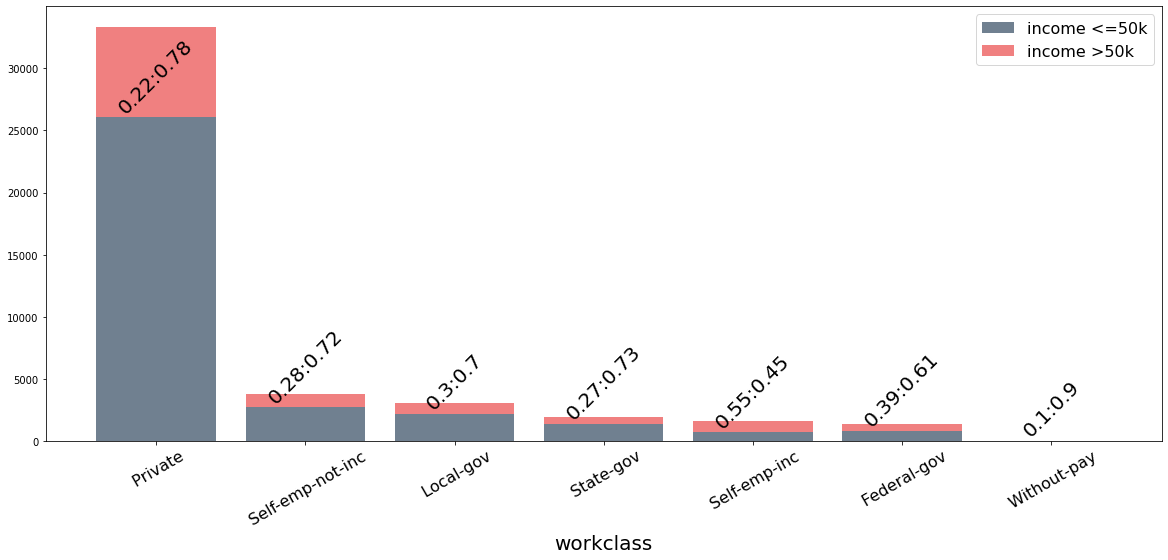

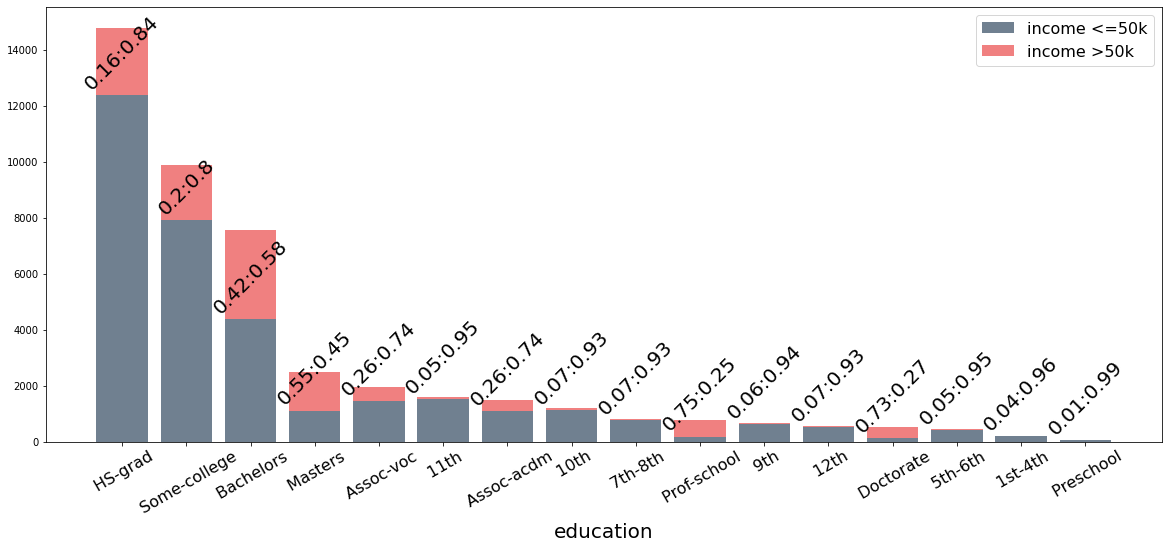

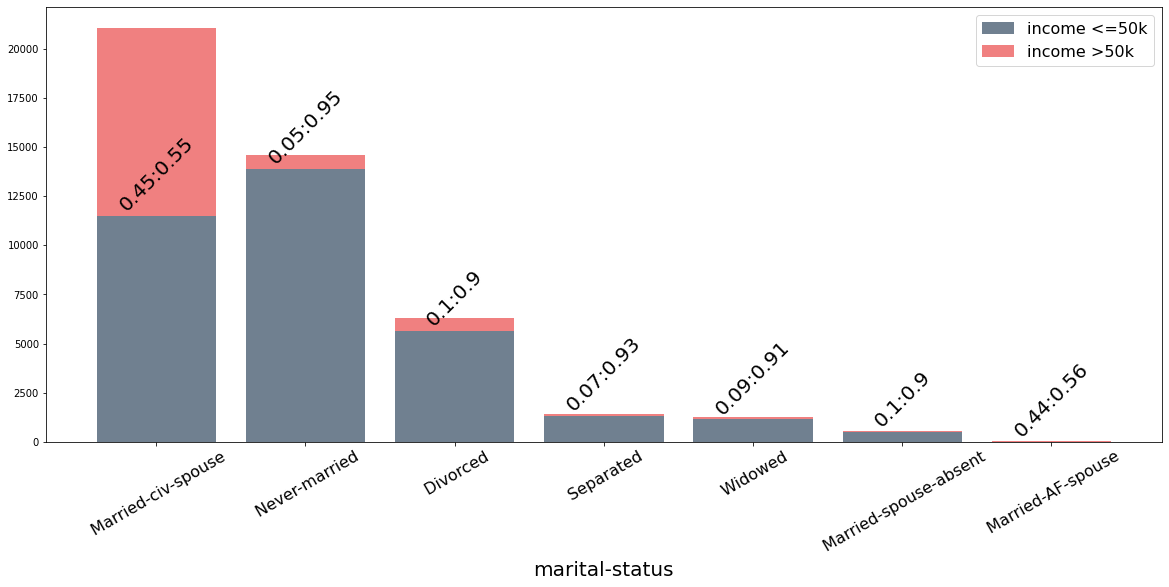

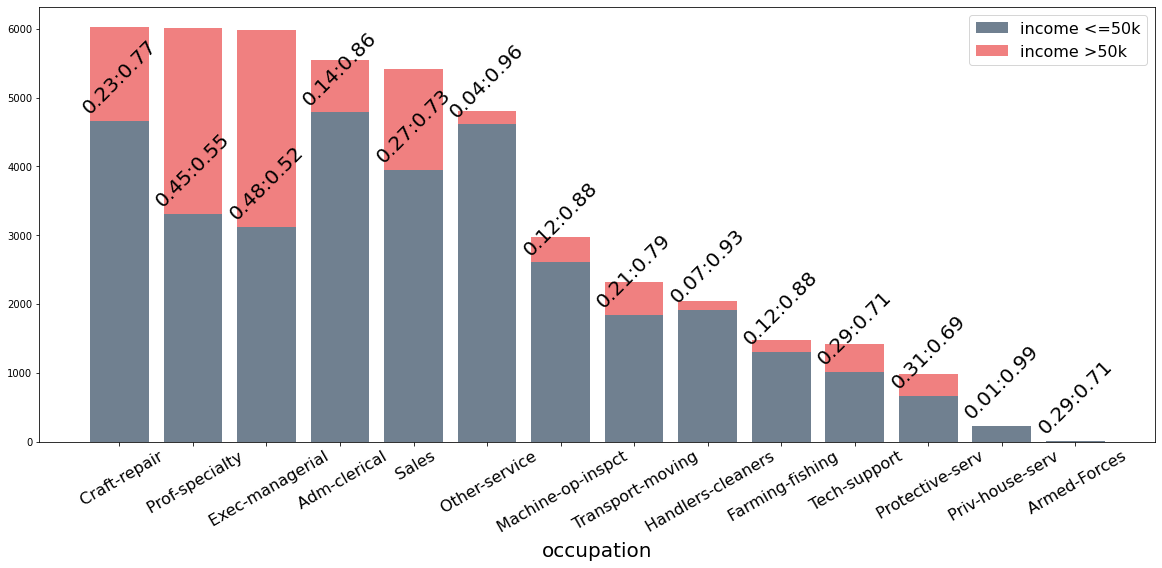

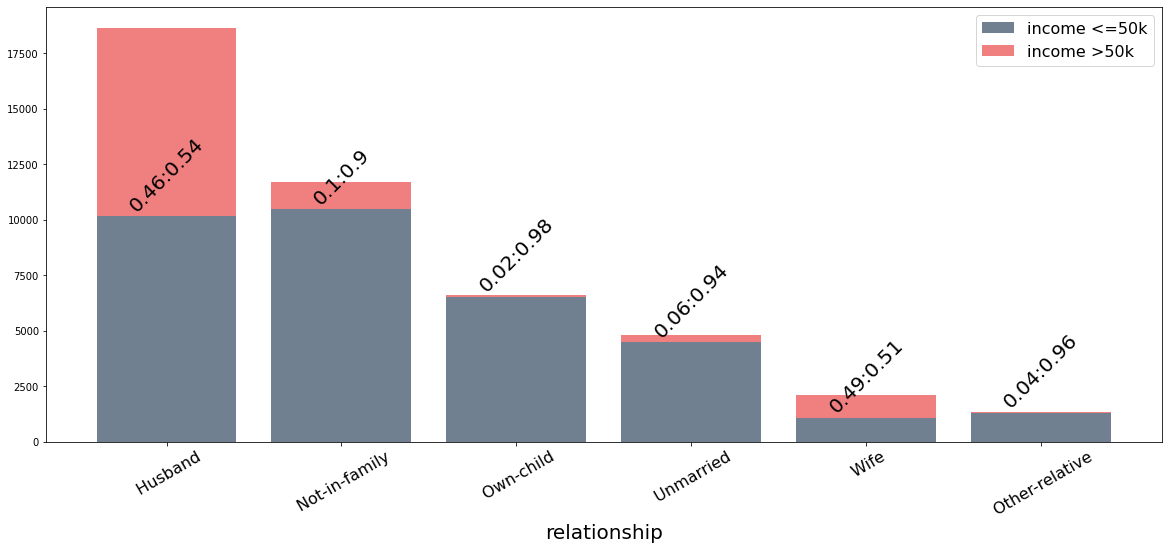

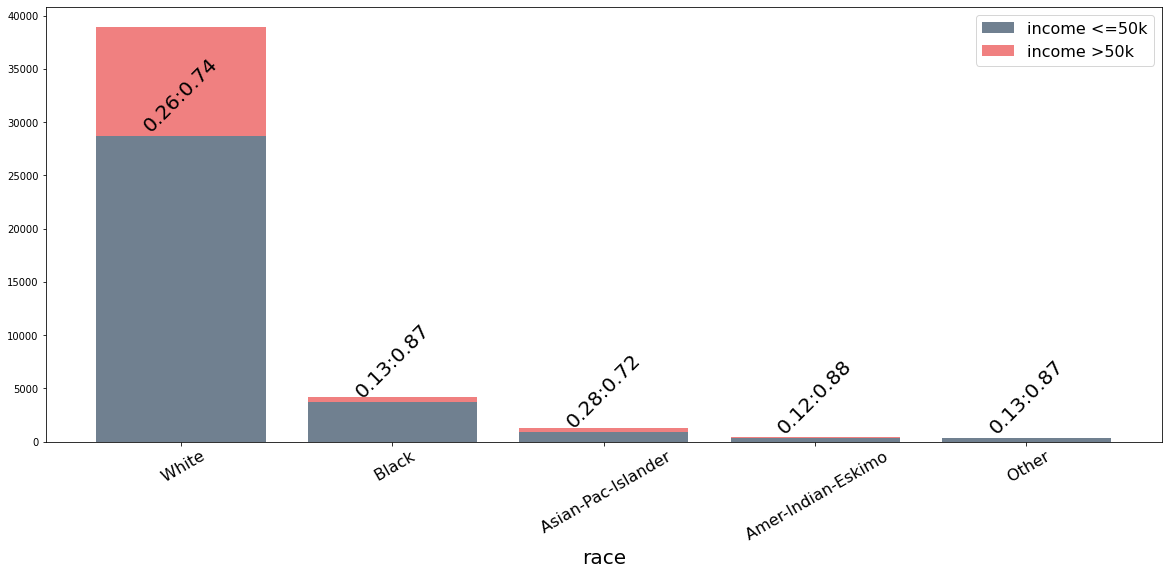

In [137]:
for label in col_string[:]:
    list_=adult_data[label].value_counts().index.tolist()
    g50k=[adult_data.loc[(adult_data['income']==' >50K')&(adult_data[label]==class_),label].count() for class_ in list_]
    l50k=[adult_data.loc[(adult_data['income']==' <=50K')&(adult_data[label]==class_),label].count() for class_ in list_]
    fig,ax=plt.subplots(1,1,figsize=(20,8))
    rects1=ax.bar(list_,l50k,color="slategrey",label="income <=50k")
    rects2=ax.bar(list_,g50k,color="lightcoral",bottom=l50k,label="income >50k")
    plt.xticks(fontsize=16,rotation=30)
    ax.set_xlabel(label,fontsize=20)
    ax.legend(fontsize=16)
    for i in range(len(g50k)):
        text_=str(round(g50k[i]/(g50k[i]+l50k[i]),2))+':'+str(round(l50k[i]/(g50k[i]+l50k[i]),2))
        ax.text(i, l50k[i]+50, text_, ha="center", va="bottom",fontsize=20,rotation=45)
    plt.show()

In [92]:
## sex
fig,ax=plt.subplots(1,2,figsize=(20,8))
ticks2=[' Male',' Female']
sizes2=[adult_data.loc[adult_data['sex']==class_,'sex'].count() for class_ in ticks2]
colors=['thistle','mediumvioletred']
patches,text1,text2 = ax[0].pie(sizes2,explode=[0,0.2],labels=ticks2,colors=colors,autopct = '%3.2f%%',startangle =90,pctdistance = 0.6)
for t in text2:
    t.set_size(16)
for t in text1:
    t.set_size(16)
g50k=[adult_data.loc[(adult_data['income']==' >50K')&(adult_data['sex']==class_),label].count() for class_ in ticks2]
l50k=[adult_data.loc[(adult_data['income']==' <=50K')&(adult_data['sex']==class_),label].count() for class_ in ticks2]
rects1=ax[1].bar(ticks2,l50k,color="slategrey",label="income <=50k")
rects2=ax[1].bar(ticks2,g50k,color="lightcoral",bottom=l50k,label="income >50k")
for i in range(2):
    text_=str(round(g50k[i]/(g50k[i]+l50k[i]),2))+':'+str(round(l50k[i]/(g50k[i]+l50k[i]),2))
    ax[1].text(i, l50k[i], text_, ha="center", va="bottom",fontsize=20)
plt.xticks(fontsize=16)
ax[1].legend(fontsize=20)

In [139]:
## native country
df=adult_data['native-country'].value_counts().rename_axis('classes').reset_index(name='counts')
ticks=list(df['classes'])
sizes=list(df['counts'])
print(len(ticks))
print(ticks)
print(sizes)

41
[' United-States', ' Mexico', ' Philippines', ' Germany', ' Puerto-Rico', ' Canada', ' El-Salvador', ' India', ' Cuba', ' England', ' China', ' Jamaica', ' South', ' Italy', ' Dominican-Republic', ' Japan', ' Guatemala', ' Vietnam', ' Columbia', ' Poland', ' Haiti', ' Portugal', ' Iran', ' Taiwan', ' Greece', ' Nicaragua', ' Peru', ' Ecuador', ' France', ' Ireland', ' Thailand', ' Hong', ' Trinadad&Tobago', ' Cambodia', ' Yugoslavia', ' Outlying-US(Guam-USVI-etc)', ' Laos', ' Scotland', ' Honduras', ' Hungary', ' Holand-Netherlands']
[41292, 903, 283, 193, 175, 163, 147, 147, 133, 119, 113, 103, 101, 100, 97, 89, 86, 83, 82, 81, 69, 62, 56, 55, 49, 48, 45, 43, 36, 36, 29, 28, 26, 26, 23, 22, 21, 20, 19, 18, 1]


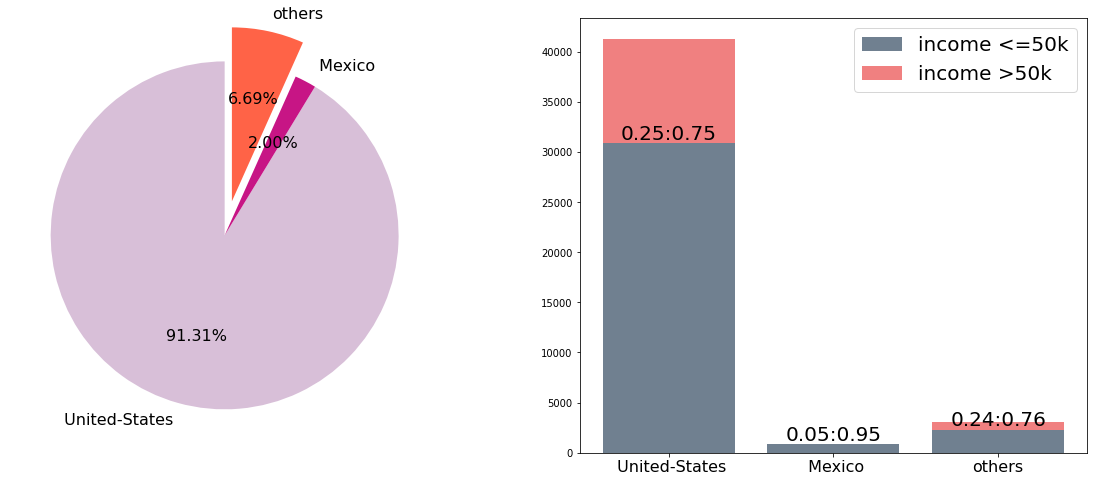

In [141]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
ticks2=ticks[:2]+['others']
sizes2=sizes[:2]+[df['counts'].sum()-sizes[0]-sizes[1]]
colors=['thistle','mediumvioletred','tomato']
patches,text1,text2 = ax[0].pie(sizes2,explode=[0,0,0.2],labels=ticks2,colors=colors,autopct = '%3.2f%%',startangle =90,pctdistance = 0.6)
for t in text2:
    t.set_size(16)
for t in text1:
    t.set_size(16)
g50k=[adult_data.loc[(adult_data['income']==' >50K')&(adult_data['native-country']==class_),label].count() for class_ in ticks[:2]]
l50k=[adult_data.loc[(adult_data['income']==' <=50K')&(adult_data['native-country']==class_),label].count() for class_ in ticks[:2]]
gother=adult_data.loc[(adult_data['income']==' >50K'),label].count()-np.array(g50k).sum()
lother=adult_data.loc[(adult_data['income']==' <=50K'),label].count()-np.array(l50k).sum()
g50k=g50k+[gother];l50k=l50k+[lother]
rects1=ax[1].bar(ticks2,l50k,color="slategrey",label="income <=50k")
rects2=ax[1].bar(ticks2,g50k,color="lightcoral",bottom=l50k,label="income >50k")
for i in range(3):
    text_=str(round(g50k[i]/(g50k[i]+l50k[i]),2))+':'+str(round(l50k[i]/(g50k[i]+l50k[i]),2))
    ax[1].text(i, l50k[i], text_, ha="center", va="bottom",fontsize=20)
plt.xticks(fontsize=16)
ax[1].legend(fontsize=20)

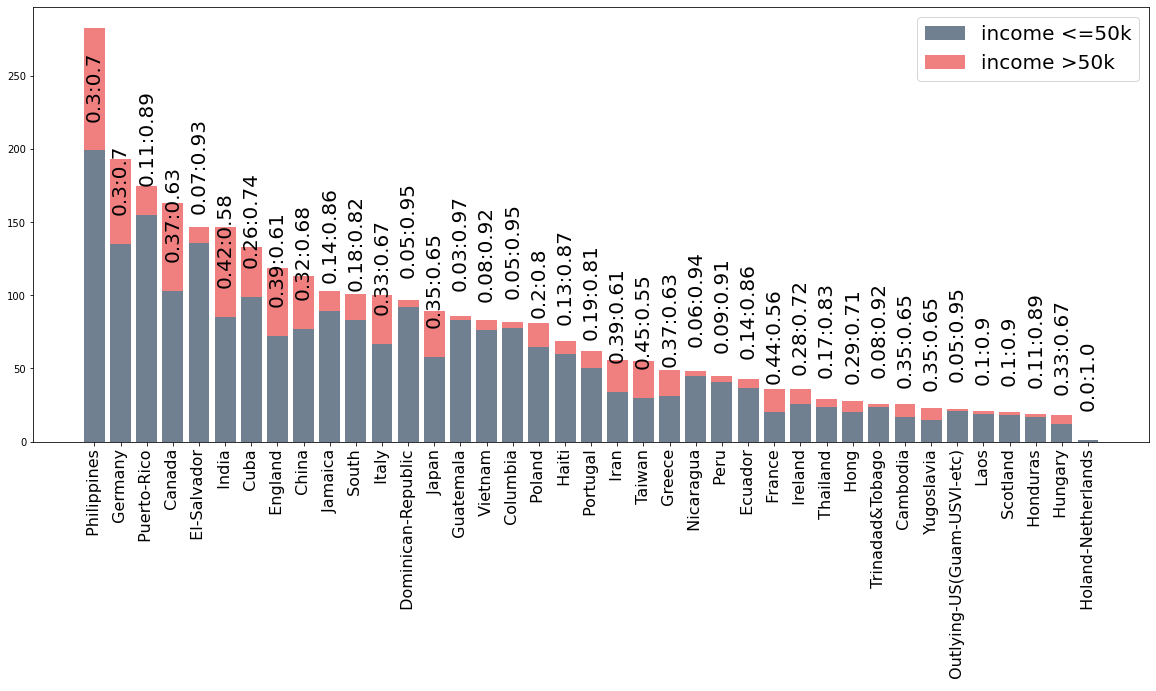

In [145]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
g50k=[adult_data.loc[(adult_data['income']==' >50K')&(adult_data['native-country']==class_),label].count() for class_ in ticks[2:]]
l50k=[adult_data.loc[(adult_data['income']==' <=50K')&(adult_data['native-country']==class_),label].count() for class_ in ticks[2:]]
rects1=ax.bar(ticks[2:],l50k,color="slategrey",label="income <=50k")
rects2=ax.bar(ticks[2:],g50k,color="lightcoral",bottom=l50k,label="income >50k")
for i in range(len(ticks[2:])):
    text_=str(round(g50k[i]/(g50k[i]+l50k[i]),2))+':'+str(round(l50k[i]/(g50k[i]+l50k[i]),2))
    ax.text(i,l50k[i]+20,text_, ha="center", va="bottom",fontsize=20,rotation=90)
plt.xticks(fontsize=16,rotation=90)
plt.legend(fontsize=20)
plt.show()

## 处理字符型特征

In [15]:
#取出数据
string_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
string_data = adult_data[string_columns]
print(string_data.shape)
#one_hot转换
string_data = pd.get_dummies(string_data)
print(string_data.shape)

string_data.head()

(45222, 6)
(45222, 41)


,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [16]:
#转换成numpy数组
string_data = string_data.values
print(string_data)

[[0 0 0 ... 1 0 1]
 [0 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 1]
 ...
 [0 0 1 ... 1 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 1 0 1]]


## 处理数值型特征

In [17]:
value_columns = ['age','education-num','capital-gain','capital-loss', 'hours-per-week']
value_data = adult_data[value_columns]

#没有缺失值，下一步进行归一化处理

#先把数据转换成float类型
value_data = value_data.astype(float)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
value_data = scaler.fit_transform(value_data)

In [18]:
X = np.append(string_data, value_data, axis=1)
y = np.array([1 if label==' >50K'else -1 for label in adult_data['income']]);train_length=32561
X_train = X[:train_length]
y_train = y[:train_length]
X_test = X[train_length:]
y_test = y[train_length:]

len(y_train[y_train==1])/len(y_train[y_train==-1])

print(X_train.shape)

print(y_train.shape)

print(y_test.shape)

(32561, 46)
(32561,)
(12661,)


#### Unbalanced Data

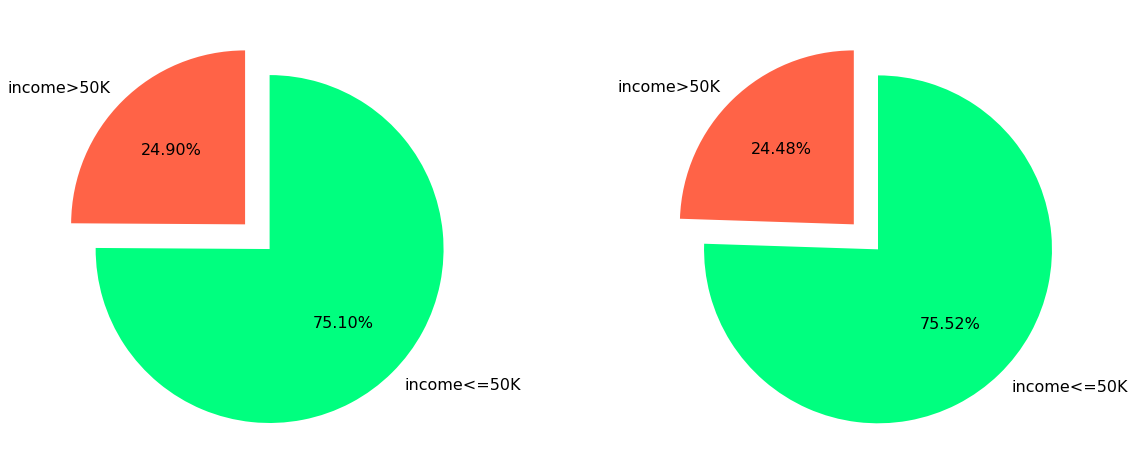

In [76]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sizes=[len(y_train[y_train==1]),len(y_train[y_train!=1])];sizes2=[len(y_test[y_test==1]),len(y_test[y_test!=1])]
colors=['tomato','springgreen']
patches,text1,text2 = ax[0].pie(sizes,explode=[0,0.2],labels=['income>50K','income<=50K'],colors=colors,autopct = '%3.2f%%',startangle =90,pctdistance = 0.6)
for t in text2:
    t.set_size(16)
for t in text1:
    t.set_size(16)
    
patches,text1,text2 = ax[1].pie(sizes2,explode=[0,0.2],labels=['income>50K','income<=50K'],colors=colors,autopct = '%3.2f%%',startangle =90,pctdistance = 0.6)
for t in text2:
    t.set_size(16)
for t in text1:
    t.set_size(16)

## 模型构造以及训练
+ LibLinear
+ LibSVM

In [20]:
import time
from sklearn.svm import LinearSVC, SVC

training time is 1.8481056690216064
train_set accuracy is 0.8483768926015786
test_set accuracy is 0.8501698128109944
TP=4864,TN=22760,FP=1693,FN=3244
performance of training model(C=0.1):
precsion=74.18%,recall=59.99%,F1 score=0.663,AUC=0.765

TP=1849,TN=8915,FP=646,FN=1251
performance of test model(C=0.1):
precsion=74.11%,recall=59.65%,F1 score=0.661,AUC=0.764

training time is 2.491142511367798
train_set accuracy is 0.8040293602776327
test_set accuracy is 0.8018323987046837
TP=6907,TN=19273,FP=5180,FN=1201
performance of training model(C=0.1):
precsion=57.14%,recall=85.19%,F1 score=0.684,AUC=0.82

TP=2627,TN=7525,FP=2036,FN=473
performance of test model(C=0.1):
precsion=56.34%,recall=84.74%,F1 score=0.677,AUC=0.817

training time is 2.8301618099212646
train_set accuracy is 0.8482233346641688
test_set accuracy is 0.8499328647026301
TP=4832,TN=22787,FP=1666,FN=3276
performance of training model(C=0.01):
precsion=74.36%,recall=59.6%,F1 score=0.662,AUC=0.764

TP=1838,TN=8923,FP=638,FN=12

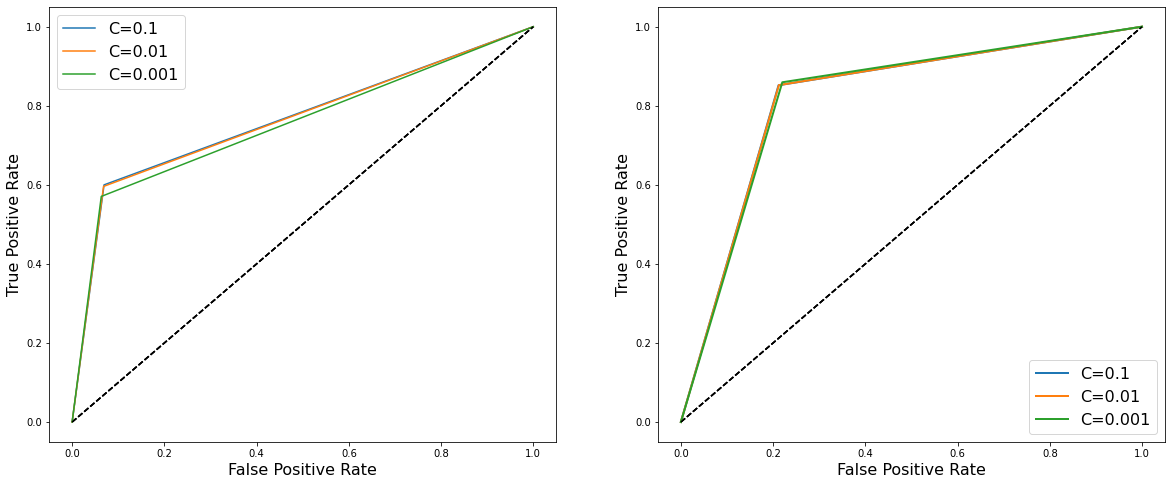

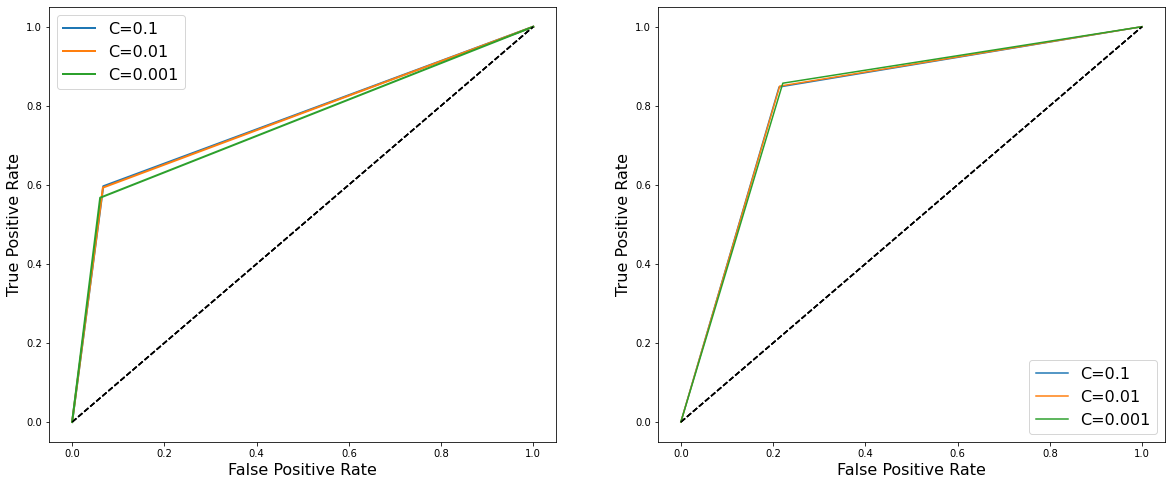

In [70]:
start_time = time.time()
fig,ax=plt.subplots(1,2,figsize=(20,8))
fig1,ax1=plt.subplots(1,2,figsize=(20,8))
for C in [0.1,0.01,0.001]: 
    modellib = LinearSVC(C=C)
    modellib.fit(X_train, y_train)
    print('training time is {}'.format(time.time()-start_time))
    print('train_set accuracy is {}'.format(modellib.score(X_train, y_train)))
    print('test_set accuracy is {}'.format(modellib.score(X_test, y_test)))
    X_trainp=modellib.predict(X_train)
    X_testp=modellib.predict(X_test)
    
    # TP,TN,FP,FN of training models
    TP=len(y_train[(X_trainp==1)&(y_train==1)]);TN=len(y_train[(X_trainp==-1)&(y_train==-1)])
    FP=len(y_train[(X_trainp==1)&(y_train==-1)]);FN=len(y_train[(X_trainp==-1)&(y_train==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision);FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)))
    print('performance of training model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax[0].plot([0,FPR,1],[0,Recall,1],label='C='+str(C))
    ax[0].legend(fontsize=16)
    
    # TP,TN,FP,FN of test models
    TP=len(y_test[(X_testp==1)&(y_test==1)]);TN=len(y_test[(X_testp==-1)&(y_test==-1)])
    FP=len(y_test[(X_testp==1)&(y_test==-1)]);FN=len(y_test[(X_testp==-1)&(y_test==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision)
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)));FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('performance of test model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax1[0].plot([0,FPR,1],[0,Recall,1],lw=2,label='C='+str(C))
    ax1[0].legend(fontsize=16)
    
    start_time = time.time()
    modellib = LinearSVC(C=C,class_weight='balanced')
    modellib.fit(X_train, y_train)
    print('training time is {}'.format(time.time()-start_time))
    print('train_set accuracy is {}'.format(modellib.score(X_train, y_train)))
    print('test_set accuracy is {}'.format(modellib.score(X_test, y_test)))
    X_trainp=modellib.predict(X_train)
    X_testp=modellib.predict(X_test)
    
    # TP,TN,FP,FN of training models
    TP=len(y_train[(X_trainp==1)&(y_train==1)]);TN=len(y_train[(X_trainp==-1)&(y_train==-1)])
    FP=len(y_train[(X_trainp==1)&(y_train==-1)]);FN=len(y_train[(X_trainp==-1)&(y_train==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision);FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)))
    print('performance of training model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax[1].plot([0,FPR,1],[0,Recall,1],lw=2,label='C='+str(C))
    ax[1].legend(fontsize=16)
    
    # TP,TN,FP,FN of test models
    TP=len(y_test[(X_testp==1)&(y_test==1)]);TN=len(y_test[(X_testp==-1)&(y_test==-1)])
    FP=len(y_test[(X_testp==1)&(y_test==-1)]);FN=len(y_test[(X_testp==-1)&(y_test==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision)
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)));FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('performance of test model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax1[1].plot([0,FPR,1],[0,Recall,1],label='C='+str(C))
    ax[0].plot([0,1],[0,1],c='k',linestyle='--');ax[1].plot([0,1],[0,1],c='k',linestyle='--')
    ax1[0].plot([0,1],[0,1],c='k',linestyle='--');ax1[1].plot([0,1],[0,1],c='k',linestyle='--')
    ax[0].set_ylabel('True Positive Rate',fontsize=16);ax[0].set_xlabel('False Positive Rate',fontsize=16)
    ax[1].set_ylabel('True Positive Rate',fontsize=16);ax[1].set_xlabel('False Positive Rate',fontsize=16)
    ax1[0].set_ylabel('True Positive Rate',fontsize=16);ax1[0].set_xlabel('False Positive Rate',fontsize=16)
    ax1[1].set_ylabel('True Positive Rate',fontsize=16);ax1[1].set_xlabel('False Positive Rate',fontsize=16)
    ax1[1].legend(fontsize=16)

training time is 43.45248532295227
train_set accuracy is 0.8468413132274807
test_set accuracy is 0.8488271068635969
TP=4846,TN=22728,FP=1725,FN=3262
performance of training model(C=0.1):
precsion=73.75%,recall=59.77%,F1 score=0.66,AUC=0.764

TP=1833,TN=8914,FP=647,FN=1267
performance of test model(C=0.1):
precsion=73.91%,recall=59.13%,F1 score=0.657,AUC=0.762

training time is 62.1625554561615
train_set accuracy is 0.7943859218082983
test_set accuracy is 0.794092093831451
TP=6948,TN=18918,FP=5535,FN=1160
performance of training model(C=0.1):
precsion=55.66%,recall=85.69%,F1 score=0.675,AUC=0.815

TP=2660,TN=7394,FP=2167,FN=440
performance of test model(C=0.1):
precsion=55.11%,recall=85.81%,F1 score=0.671,AUC=0.816

training time is 179.55127000808716
train_set accuracy is 0.8465034857651792
test_set accuracy is 0.8490640549719611
TP=4691,TN=22872,FP=1581,FN=3417
performance of training model(C=0.01):
precsion=74.79%,recall=57.86%,F1 score=0.652,AUC=0.757

TP=1790,TN=8960,FP=601,FN=1310

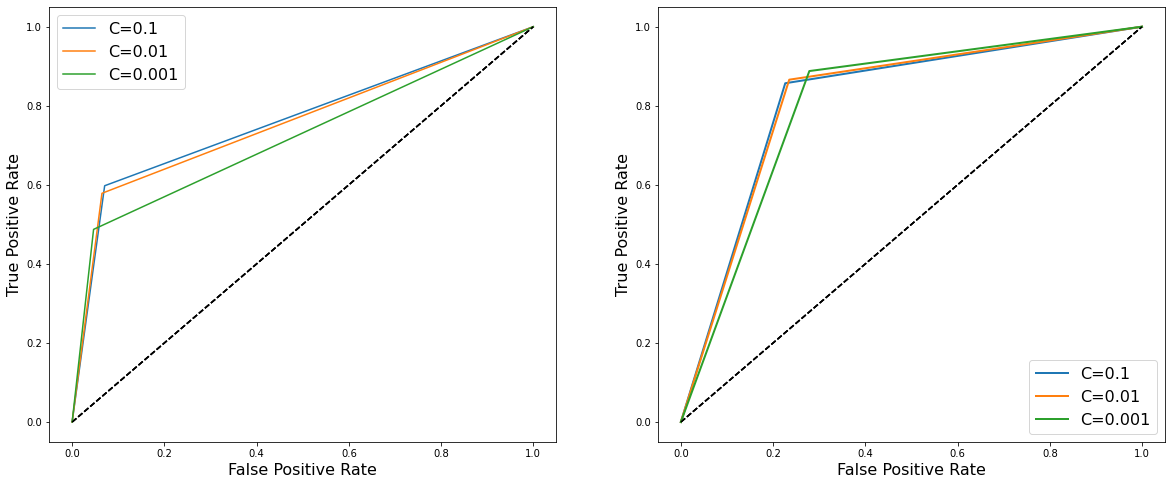

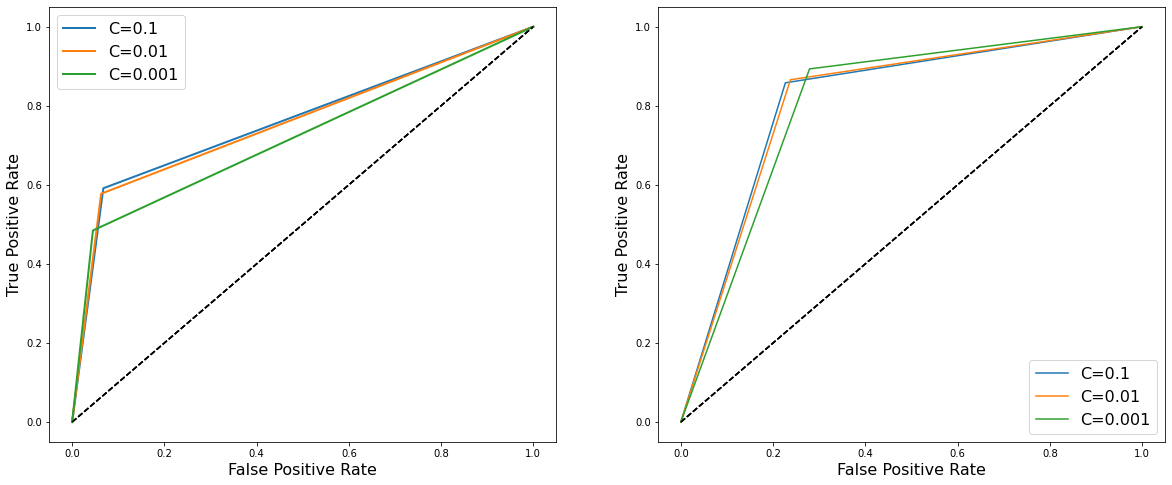

In [23]:
start_time = time.time()
fig,ax=plt.subplots(1,2,figsize=(20,8))
fig1,ax1=plt.subplots(1,2,figsize=(20,8))
for C in [0.1,0.01,0.001]: 
    modelrbf = SVC(kernel='linear',C=C)
    modelrbf.fit(X_train, y_train)
    print('training time is {}'.format(time.time()-start_time))
    print('train_set accuracy is {}'.format(modelrbf.score(X_train, y_train)))
    print('test_set accuracy is {}'.format(modelrbf.score(X_test, y_test)))
    X_trainp=modelrbf.predict(X_train)
    X_testp=modelrbf.predict(X_test)
    
    # TP,TN,FP,FN of training models
    TP=len(y_train[(X_trainp==1)&(y_train==1)]);TN=len(y_train[(X_trainp==-1)&(y_train==-1)])
    FP=len(y_train[(X_trainp==1)&(y_train==-1)]);FN=len(y_train[(X_trainp==-1)&(y_train==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision);FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)))
    print('performance of training model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax[0].plot([0,FPR,1],[0,Recall,1],label='C='+str(C))
    ax[0].legend(fontsize=16)
    
    # TP,TN,FP,FN of test models
    TP=len(y_test[(X_testp==1)&(y_test==1)]);TN=len(y_test[(X_testp==-1)&(y_test==-1)])
    FP=len(y_test[(X_testp==1)&(y_test==-1)]);FN=len(y_test[(X_testp==-1)&(y_test==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision)
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)));FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('performance of test model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax1[0].plot([0,FPR,1],[0,Recall,1],lw=2,label='C='+str(C))
    ax1[0].legend(fontsize=16)
    
    start_time = time.time()
    modelrbf = SVC(kernel='linear',C=C,class_weight='balanced')
    modelrbf.fit(X_train, y_train)
    print('training time is {}'.format(time.time()-start_time))
    print('train_set accuracy is {}'.format(modelrbf.score(X_train, y_train)))
    print('test_set accuracy is {}'.format(modelrbf.score(X_test, y_test)))
    X_trainp=modelrbf.predict(X_train)
    X_testp=modelrbf.predict(X_test)
    
    # TP,TN,FP,FN of training models
    TP=len(y_train[(X_trainp==1)&(y_train==1)]);TN=len(y_train[(X_trainp==-1)&(y_train==-1)])
    FP=len(y_train[(X_trainp==1)&(y_train==-1)]);FN=len(y_train[(X_trainp==-1)&(y_train==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision);FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)))
    print('performance of training model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax[1].plot([0,FPR,1],[0,Recall,1],lw=2,label='C='+str(C))
    ax[1].legend(fontsize=16)
    
    # TP,TN,FP,FN of test models
    TP=len(y_test[(X_testp==1)&(y_test==1)]);TN=len(y_test[(X_testp==-1)&(y_test==-1)])
    FP=len(y_test[(X_testp==1)&(y_test==-1)]);FN=len(y_test[(X_testp==-1)&(y_test==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision)
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)));FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('performance of test model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax1[1].plot([0,FPR,1],[0,Recall,1],label='C='+str(C))
    ax[0].plot([0,1],[0,1],c='k',linestyle='--');ax[1].plot([0,1],[0,1],c='k',linestyle='--')
    ax1[0].plot([0,1],[0,1],c='k',linestyle='--');ax1[1].plot([0,1],[0,1],c='k',linestyle='--')
    ax[0].set_ylabel('True Positive Rate',fontsize=16);ax[0].set_xlabel('False Positive Rate',fontsize=16)
    ax[1].set_ylabel('True Positive Rate',fontsize=16);ax[1].set_xlabel('False Positive Rate',fontsize=16)
    ax1[0].set_ylabel('True Positive Rate',fontsize=16);ax1[0].set_xlabel('False Positive Rate',fontsize=16)
    ax1[1].set_ylabel('True Positive Rate',fontsize=16);ax1[1].set_xlabel('False Positive Rate',fontsize=16)
    ax1[1].legend(fontsize=16)

training time is 50.80290603637695
train_set accuracy is 0.859525198857529
test_set accuracy is 0.8548297922754917
TP=5026,TN=22961,FP=1492,FN=3082
performance of training model(C=1):
precsion=77.11%,recall=61.99%,F1 score=0.687,AUC=0.779

TP=1859,TN=8964,FP=597,FN=1241
performance of test model(C=1):
precsion=75.69%,recall=59.97%,F1 score=0.669,AUC=0.769

training time is 69.59098052978516
train_set accuracy is 0.8145020116089801
test_set accuracy is 0.8053076376273596
TP=7166,TN=19355,FP=5098,FN=942
performance of training model(C=1):
precsion=58.43%,recall=88.38%,F1 score=0.704,AUC=0.838

TP=2682,TN=7514,FP=2047,FN=418
performance of test model(C=1):
precsion=56.71%,recall=86.52%,F1 score=0.685,AUC=0.826

training time is 199.85143089294434
train_set accuracy is 0.8513252049998464
test_set accuracy is 0.8532501382197298
TP=4661,TN=23059,FP=1394,FN=3447
performance of training model(C=0.1):
precsion=76.98%,recall=57.49%,F1 score=0.658,AUC=0.759

TP=1755,TN=9048,FP=513,FN=1345
perform

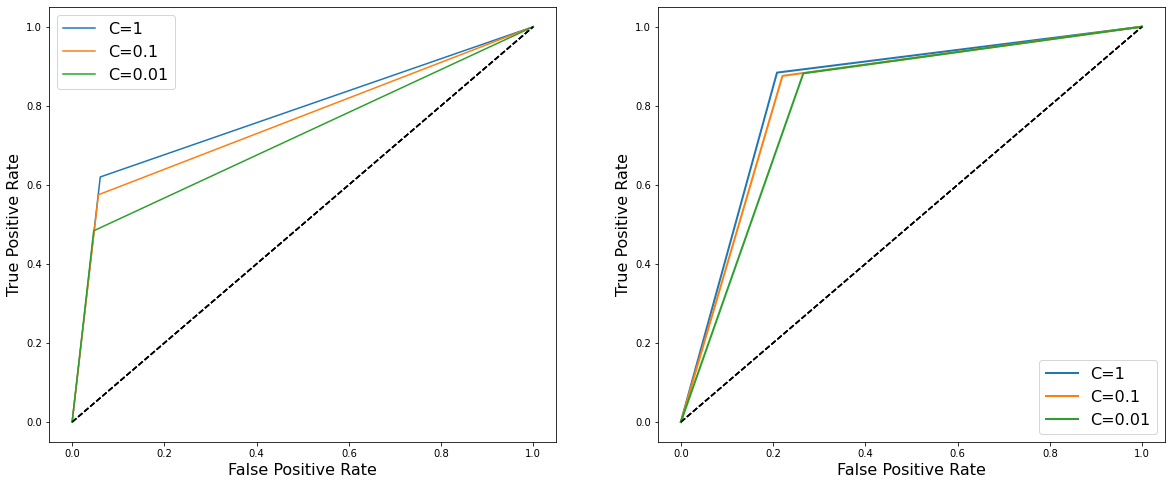

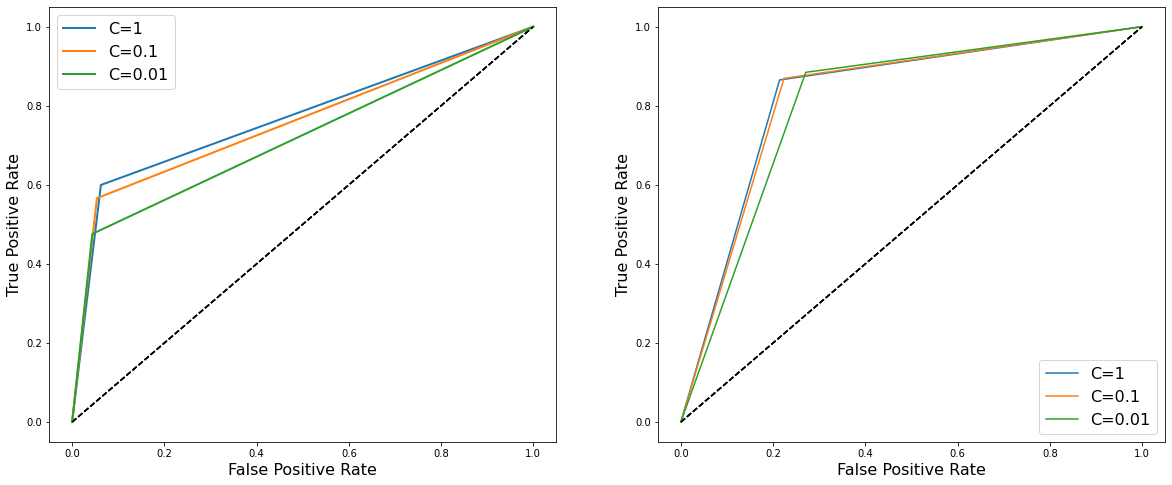

In [106]:
start_time = time.time()
fig,ax=plt.subplots(1,2,figsize=(20,8))
fig1,ax1=plt.subplots(1,2,figsize=(20,8))
for C in [1,0.1,0.01]: 
    modelrbf = SVC(kernel='rbf',C=C)
    modelrbf.fit(X_train, y_train)
    print('training time is {}'.format(time.time()-start_time))
    print('train_set accuracy is {}'.format(modelrbf.score(X_train, y_train)))
    print('test_set accuracy is {}'.format(modelrbf.score(X_test, y_test)))
    X_trainp=modelrbf.predict(X_train)
    X_testp=modelrbf.predict(X_test)
    
    # TP,TN,FP,FN of training models
    TP=len(y_train[(X_trainp==1)&(y_train==1)]);TN=len(y_train[(X_trainp==-1)&(y_train==-1)])
    FP=len(y_train[(X_trainp==1)&(y_train==-1)]);FN=len(y_train[(X_trainp==-1)&(y_train==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision);FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)))
    print('performance of training model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax[0].plot([0,FPR,1],[0,Recall,1],label='C='+str(C))
    ax[0].legend(fontsize=16)
    
    # TP,TN,FP,FN of test models
    TP=len(y_test[(X_testp==1)&(y_test==1)]);TN=len(y_test[(X_testp==-1)&(y_test==-1)])
    FP=len(y_test[(X_testp==1)&(y_test==-1)]);FN=len(y_test[(X_testp==-1)&(y_test==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision)
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)));FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('performance of test model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax1[0].plot([0,FPR,1],[0,Recall,1],lw=2,label='C='+str(C))
    ax1[0].legend(fontsize=16)
    
    start_time = time.time()
    modelrbf = SVC(kernel='rbf',C=C,class_weight='balanced')
    modelrbf.fit(X_train, y_train)
    print('training time is {}'.format(time.time()-start_time))
    print('train_set accuracy is {}'.format(modelrbf.score(X_train, y_train)))
    print('test_set accuracy is {}'.format(modelrbf.score(X_test, y_test)))
    X_trainp=modelrbf.predict(X_train)
    X_testp=modelrbf.predict(X_test)
    
    # TP,TN,FP,FN of training models
    TP=len(y_train[(X_trainp==1)&(y_train==1)]);TN=len(y_train[(X_trainp==-1)&(y_train==-1)])
    FP=len(y_train[(X_trainp==1)&(y_train==-1)]);FN=len(y_train[(X_trainp==-1)&(y_train==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision);FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)))
    print('performance of training model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax[1].plot([0,FPR,1],[0,Recall,1],lw=2,label='C='+str(C))
    ax[1].legend(fontsize=16)
    
    # TP,TN,FP,FN of test models
    TP=len(y_test[(X_testp==1)&(y_test==1)]);TN=len(y_test[(X_testp==-1)&(y_test==-1)])
    FP=len(y_test[(X_testp==1)&(y_test==-1)]);FN=len(y_test[(X_testp==-1)&(y_test==1)])
    #Precison,recall,F1
    Precision=TP/(TP+FP);Recall=TP/(TP+FN);F1=2*Recall*Precision/(Recall+Precision)
    print('TP='+str(int(TP))+',TN='+str(int(TN))+',FP='+str(int(FP))+',FN='+str(int(FN)));FPR=FP/(FP+TN);AUC=(Recall+TN/(TN+FP))/2
    print('performance of test model(C='+str(C)+'):\nprecsion='+str(round(100*Precision,2))+'%,recall='+str(round(100*Recall,2))
          +'%,F1 score='+str(round(F1,3))+',AUC='+str(round(AUC,3))+'\n')
    ax1[1].plot([0,FPR,1],[0,Recall,1],label='C='+str(C))
    ax[0].plot([0,1],[0,1],c='k',linestyle='--');ax[1].plot([0,1],[0,1],c='k',linestyle='--')
    ax1[0].plot([0,1],[0,1],c='k',linestyle='--');ax1[1].plot([0,1],[0,1],c='k',linestyle='--')
    ax[0].set_ylabel('True Positive Rate',fontsize=16);ax[0].set_xlabel('False Positive Rate',fontsize=16)
    ax[1].set_ylabel('True Positive Rate',fontsize=16);ax[1].set_xlabel('False Positive Rate',fontsize=16)
    ax1[0].set_ylabel('True Positive Rate',fontsize=16);ax1[0].set_xlabel('False Positive Rate',fontsize=16)
    ax1[1].set_ylabel('True Positive Rate',fontsize=16);ax1[1].set_xlabel('False Positive Rate',fontsize=16)
    ax1[1].legend(fontsize=16)

+ SVMlight

In [24]:
num_feature = X_train.shape[1]
with open('svmlight_train_data.txt','w') as f:
    for i in range(train_length):
        if y_train[i] == -1:
            label = '-1'
        else:
            label = '1'
        
        feature_pair = ''
        for index in range(num_feature):
            feature_pair = feature_pair + ' '+str(index+1)+':'+str(X_train[i][index])
            
        sample = label + feature_pair+'\n'
        f.writelines(sample)

In [25]:
num_feature = X_train.shape[1] 
with open('svmlight_test_data.txt','w') as f:
    for i in range(X_test.shape[0]):
        if y_test[i] == -1:
            label = '-1'
        else:
            label = '1'
        
        feature_pair = ''
        for index in range(num_feature):
            feature_pair = feature_pair + ' '+str(index+1)+':'+str(X_test[i][index])
            
        sample = label + feature_pair+'\n'
        f.writelines(sample)

In [27]:
#linear,c=0.1,unbalanced
!svm_learn.exe -z c -c 0.1 svmlight_train_data.txt

!svm_classify.exe svmlight_train_data.txt svm_model

!svm_classify.exe svmlight_test_data.txt svm_model

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

Reading model...OK. (11611 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [28]:
#linear,c=0.01,unbalanced
!svm_learn.exe -z c -c 0.01 svmlight_train_data.txt

!svm_classify.exe svmlight_train_data.txt svm_model

!svm_classify.exe svmlight_test_data.txt svm_model

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

Reading model...OK. (12135 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [29]:
#linear,c=0.001,unbalanced
!svm_learn.exe -z c -c 0.001 svmlight_train_data.txt

!svm_classify.exe svmlight_train_data.txt svm_model

!svm_classify.exe svmlight_test_data.txt svm_model

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

Reading model...OK. (13938 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [30]:
#linear,c=0.1,balanced
!svm_learn.exe -z c -c 0.1 -j 3.016064257028112 svmlight_train_data.txt

!svm_classify.exe svmlight_train_data.txt svm_model

!svm_classify.exe svmlight_test_data.txt svm_model

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

Reading model...OK. (13734 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [31]:
#linear,c=0.01,balanced
!svm_learn.exe -z c -c 0.01 -j 3.016064257028112 svmlight_train_data.txt

!svm_classify.exe svmlight_train_data.txt svm_model

!svm_classify.exe svmlight_test_data.txt svm_model

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

Reading model...OK. (14210 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [32]:
#linear,c=0.001,balanced
!svm_learn.exe -z c -c 0.001 -j 3.016064257028112 svmlight_train_data.txt

!svm_classify.exe svmlight_train_data.txt svm_model

!svm_classify.exe svmlight_test_data.txt svm_model

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

Reading model...OK. (16047 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

+ C=1,0.1,0.01;unbalanced

In [97]:
#t:2 Gaussian,c=1,unbalanced
!svm_learn.exe -z c -c 1 -t 2 -g 0.09787234042553188 svmlight_train_data.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

 Checking optimality of inactive variables...done.
 Number of inactive variables = 31369
done. (24735 iterations)
Optimization finished (4574 misclassified, maxdiff=0.00098).
Runtime in cpu-seconds: 233.83
Number of SV: 11160 (including 10194 at upper bound)
L1 loss: loss=9847.17739
Norm of weight vector: |w|=27.64899
Norm of longest example vector: |x|=1.00000
Estimated VCdim of classifier: VCdim<=1529.93352
Computing XiAlpha-estimates...done
Runtime for XiAlpha-estimates in cpu-seconds: 0.01
XiAlpha-estimate of the error: error<=32.52% (rho=1.00,depth=0)
XiAlpha-estimate of the recall: recall=>34.62% (rho=1.00,depth=0)
XiAlpha-estimate of the precision: precision=>34.67% (rho=1.00,depth=0)
Number of kernel evaluations: 784446507
Writing model file...done


In [98]:
!svm_classify.exe svmlight_train_data.txt svm_model

Reading model...OK. (11160 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [99]:
!svm_classify.exe svmlight_test_data.txt svm_model

Reading model...OK. (11160 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..done
Runtime (without IO) in cpu-seconds: 28.30
Accuracy on test set: 85.49% (10824 correct, 1837 incorrect, 12661 total)
Precision/recall on test set

In [100]:
#t:2 Gaussian,c=0.1,unbalanced
!svm_learn.exe -z c -c 0.1 -t 2 -g 0.09787234042553188 svmlight_train_data.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

In [101]:
!svm_classify.exe svmlight_train_data.txt svm_model

Reading model...OK. (11875 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [102]:
!svm_classify.exe svmlight_test_data.txt svm_model

Reading model...OK. (11875 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..done
Runtime (without IO) in cpu-seconds: 25.26
Accuracy on test set: 85.33% (10803 correct, 1858 incorrect, 12661 total)
Precision/recall on test set

In [103]:
#t:2 Gaussian,c=0.1,unbalanced
!svm_learn.exe -z c -c 0.01 -t 2 -g 0.09787234042553188 svmlight_train_data.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

In [104]:
!svm_classify.exe svmlight_train_data.txt svm_model

Reading model...OK. (14594 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [105]:
!svm_classify.exe svmlight_test_data.txt svm_model

Reading model...OK. (14594 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..done
Runtime (without IO) in cpu-seconds: 30.49
Accuracy on test set: 83.86% (10618 correct, 2043 incorrect, 12661 total)
Precision/recall on test set

In [107]:
75.1/24.9

3.016064257028112

In [108]:
#t:2 Gaussian,c=1,balanced
!svm_learn.exe -z c -c 1 -j 3.016064257028112 -t 2 -g 0.09787234042553188 svmlight_train_data.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

In [109]:
!svm_classify.exe svmlight_train_data.txt svm_model

Reading model...OK. (12841 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [110]:
!svm_classify.exe svmlight_test_data.txt svm_model

Reading model...OK. (12841 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..done
Runtime (without IO) in cpu-seconds: 27.23
Accuracy on test set: 80.53% (10196 correct, 2465 incorrect, 12661 total)
Precision/recall on test set

In [111]:
#t:2 Gaussian,c=0.1,balanced
!svm_learn.exe -z c -c 0.1 -j 3.016064257028112 -t 2 -g 0.09787234042553188 svmlight_train_data.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

In [112]:
!svm_classify.exe svmlight_train_data.txt svm_model

Reading model...OK. (13785 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [113]:
!svm_classify.exe svmlight_test_data.txt svm_model

Reading model...OK. (13785 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..done
Runtime (without IO) in cpu-seconds: 28.97
Accuracy on test set: 80.01% (10130 correct, 2531 incorrect, 12661 total)
Precision/recall on test set

In [117]:
#t:2 Gaussian,c=0.01,balanced
!svm_learn.exe -z c -c 0.01 -j 3.016064257028112 -t 2 -g 0.09787234042553188 svmlight_train_data.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

In [118]:
!svm_classify.exe svmlight_train_data.txt svm_model

Reading model...OK. (16736 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..148

In [119]:
!svm_classify.exe svmlight_test_data.txt svm_model

Reading model...OK. (16736 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..done
Runtime (without IO) in cpu-seconds: 34.90
Accuracy on test set: 77.47% (9808 correct, 2853 incorrect, 12661 total)
Precision/recall on test set: